# <span style="color: blue;">ให้กรอกรหัสนิสิต และชื่อ-นามสกุลของสมาชิกในทีม</span>
# <span style="color: blue;">(ห้ามมีสมาชิกเกิน 2 คน)</span>
## รหัสนิสิต ชื่อ-นามสกุล

<span style="color: green;"> 6714450249 นายหรินทร์ ธนะนาม </span>

## Backpropagation Exercise
In this exercise we will use backpropagation to train a multi-layer perceptron (with a single hidden layer).  We will experiment with different patterns and see how quickly or slowly the weights converge.  We will see the impact and interplay of different parameters such as learning rate, number of iterations, and number of data points.

In [1]:
#Preliminaries
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Fill out the code below so that it creates a multi-layer perceptron with a single hidden layer (with 4 nodes) and trains it via back-propagation.  Specifically your code should:

1. Initialize the weights to random values between -1 and 1
1. Perform the feed-forward computation
1. Compute the loss function
1. Calculate the gradients for all the weights via back-propagation
1. Update the weight matrices (using a learning_rate parameter)
1. Execute steps 2-5 for a fixed number of iterations
1. Plot the accuracies and log loss and observe how they change over time


Once your code is running, try it for the different patterns below.

- Which patterns was the neural network able to learn quickly and which took longer?
- What learning rates and numbers of iterations worked well?
- If you have time, try varying the size of the hidden layer and experiment with different activation functions (e.g. ReLu)

shape of x_mat_full is (4000, 3)
shape of y is (4000,)


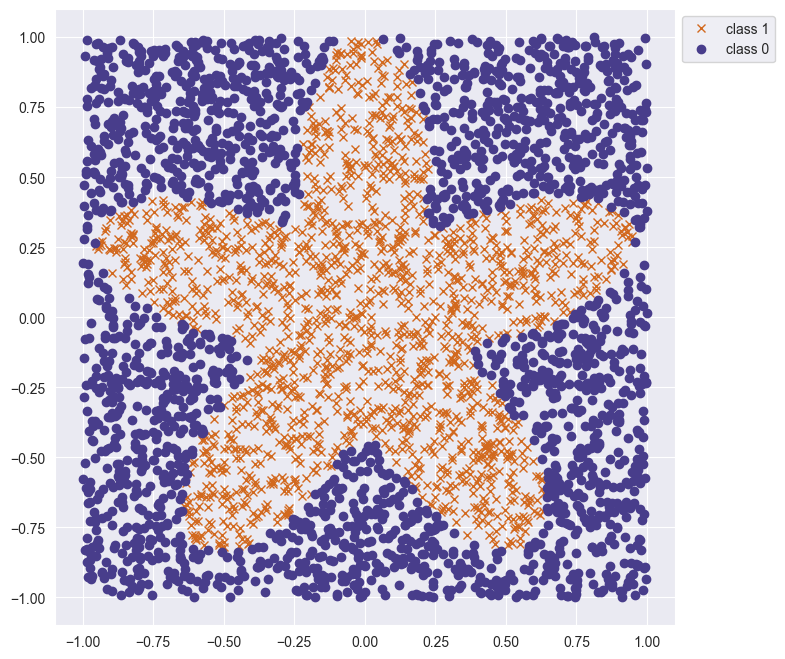

In [2]:
## This code below generates two x values and a y value according to different patterns
## It also creates a "bias" term (a vector of 1s)
## The goal is then to learn the mapping from x to y using a neural network via back-propagation

np.random.seed(12345)

num_obs = 4000
x_mat_1 = np.random.uniform(-1, 1, size=(num_obs, 2))
x_mat_bias = np.ones((num_obs, 1))
x_mat_full = np.concatenate((x_mat_1, x_mat_bias), axis=1)

# 5-petal flower shape
r = np.sqrt(x_mat_full[:, 0] ** 2 + x_mat_full[:, 1] ** 2)
theta = np.arctan2(x_mat_full[:, 1], x_mat_full[:, 0])
y = (r < (0.7 + 0.3 * np.sin(5 * theta))).astype(int)

print('shape of x_mat_full is {}'.format(x_mat_full.shape))
print('shape of y is {}'.format(y.shape))

fig,  ax = plt.subplots(figsize=(8, 8))
ax.plot(x_mat_full[y==1, 0], x_mat_full[y==1, 1], 'x', label='class 1', color='chocolate')
ax.plot(x_mat_full[y==0, 0], x_mat_full[y==0, 1], 'o', label='class 0', color='darkslateblue')
ax.grid(True)
ax.legend(loc='best', bbox_to_anchor=(1, 1))

Here are some helper functions

In [3]:
def sigmoid(x):
    """
    Sigmoid function
    """
    return 1.0 / (1.0 + np.exp(-x))

def loss_fn(y_true, y_pred, eps=1e-16):
    """
    Loss function we would like to optimize (minimize)
    We are using Logarithmic Loss
    http://scikit-learn.org/stable/modules/model_evaluation.html#log-loss
    y_true: can send y
    """
    y_pred = np.maximum(y_pred, eps)
    y_pred = np.minimum(y_pred, (1-eps))
    return -(np.sum(y_true*np.log(y_pred)) + np.sum((1-y_true)*np.log(1-y_pred)))/len(y_true)

def forward_pass(W_1, W_2, x_mat, y):
    """
    Does a forward computation of the neural network
    Takes the input `x_mat` and produces the output `y_pred`
    Also produces the gradient of the log loss function
    """
    # First,  compute the new predictions `y_pred`
    z_2 = np.dot(x_mat, W_1)
    a_2 = sigmoid(z_2)
    z_3 = np.dot(a_2, W_2)
    y_pred = sigmoid(z_3).reshape((len(x_mat), ))
    # Now compute the gradient
    J_z_3_grad = y_pred - y
    J_W_2_grad = np.dot(J_z_3_grad, a_2).reshape(-1, 1)
    a_2_z_2_grad = sigmoid(z_2)*(1-sigmoid(z_2))
    J_W_1_grad = (np.dot((J_z_3_grad).reshape(-1, 1), W_2.reshape(-1, 1).T)*a_2_z_2_grad).T.dot(x_mat).T
    gradient = (J_W_1_grad, J_W_2_grad)
    
    return y_pred, gradient

def plot_loss_accuracy(loss_vals, accuracies):
    fig = plt.figure(figsize=(16, 7))
    fig.suptitle('Log Loss and Accuracy over iterations')
    
    epochs = np.arange(1, len(loss_vals) + 1)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(epochs, loss_vals)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))
    
    ax = fig.add_subplot(1, 2, 2)
    ax.plot(epochs, accuracies)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.set_xticks([1] + list(ax.get_xticks()[ax.get_xticks() > 1]))

## <span style="color: green;">1. ปรับเพิ่มโค้ดใน Cell ด้านล่างเพื่อให้โมเดลเรียนรู้จากข้อมูลและแสดงให้เห็นว่าโมเดลให้ค่า accuracy ไม่น้อยกว่า 70%</span>

In [4]:
x_mat_full.shape[-1] # -1 will give the last dimension of matrix

3

Iteration 200: loss = 0.4659, accuracy = 0.7770
Iteration 400: loss = 0.3522, accuracy = 0.8210
Iteration 600: loss = 0.3031, accuracy = 0.8552
Iteration 800: loss = 0.2601, accuracy = 0.8815
Iteration 1000: loss = 0.2264, accuracy = 0.9048


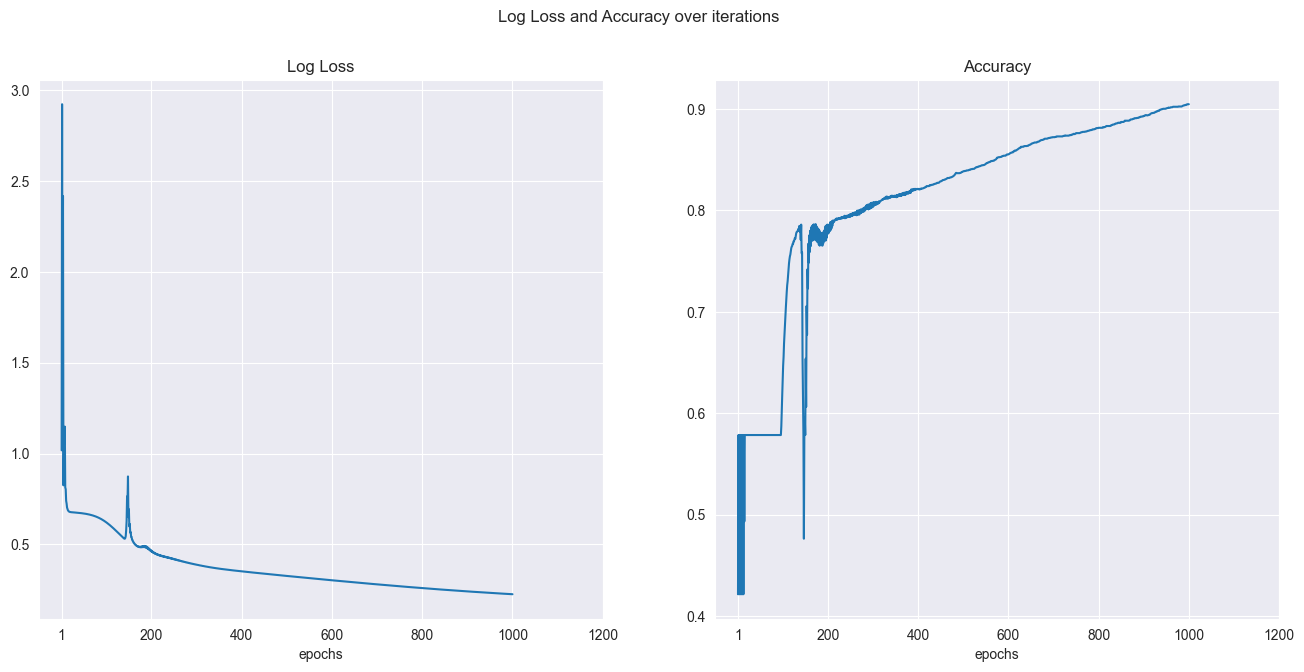

In [5]:
#### Initialize the network parameters
np.random.seed(12345)

# This is the number of features in x_mat_full
W_1_Input_Layer = x_mat_full.shape[-1]  

# This W_1 Output Layer must equal to W_2 Input Layer (TL;DR this is a layer can be adjusted)
W_1_Output_Layer = 20

# This is the output layer size, which is 1 for binary classification
W_2_Output_Layer = 1  

W_1 = np.random.uniform(-1, 1, (W_1_Input_Layer, W_1_Output_Layer))
W_2 = np.random.uniform(-1, 1, (W_1_Output_Layer, W_2_Output_Layer))

# Epochs is the number of times model will learn
num_epochs = 1000

# Learning rate is the step for each train
learning_rate = 0.001

x_mat = x_mat_full

loss_vals, accuracies = [], []
for i in range(1, num_epochs+1):
    ### Do a forward computation, and get the gradient
    y_pred, (gradient_w1, gradient_w2) = forward_pass(W_1, W_2, x_mat, y)
    
    ## Update the weight matrices
    ## By default W_1 = W_1 + (-learning_rate * gradient_w1)
    ## Then we can summarize into W_1 -= learning_rate * gradient_w1
    W_1 -= learning_rate * gradient_w1
    W_2 -= learning_rate * gradient_w2
    
    ### Compute the loss and accuracy
    loss_val = loss_fn(y, y_pred)
    loss_vals.append(loss_val)
    
    accuracy = np.mean((y_pred > 0.5) == y)
    accuracies.append(accuracy)

    ## Print the loss and accuracy for every 200th iteration
    if (i % 200 == 0):
        print('Iteration {}: loss = {:.4f}, accuracy = {:.4f}'.format(i, loss_val, accuracy))
    
plot_loss_accuracy(loss_vals, accuracies)

## <span style="color: yellow;">คำตอบ</span>
จากผลการทดสอบ พบว่าการเปลี่ยนแปลงค่า W_1_Output_Layer และ learning_rate นั้นมีผลต่อค่า Accuracy  
โดยค่า Loss และ Accuracy จะเริ่มมากกว่า 58% ตั้งแต่ 

W_1_Output_Layer >= 3 และ learnin_rate ระหว่าง 0.0004 - 0.0045  
โดยเบื้องต้นได้ทำการทดลองให้ W_1_Output_Layer = 3 แล้วปรับ learning_rate ไปเรื่อยๆ ได้ผลดังตารางด้านล่าง

| **W_1_Output_Layer** | **learning_rate** | **latest_accuracy** |
|:---------------------|:------------------|--------------------:|
| 3                    | 0.0004            | 0.7020              |
| 3                    | 0.0010            | 0.8017              |
| 3                    | 0.0020            | 0.7600              |
| 3                    | 0.0030            | 0.7708              |
| 3                    | 0.0045            | 0.7215              |

จากการทดสอบเปลี่ยนค่า learning_rate ที่ W_1_Output_Layer = 3 พบว่า **learning_rate ที่ 0.001** ทำให้ค่า accuracy ที่มากที่สุด

ดังนั้นจึงเริ่มทดสอบปรับค่า W_1_Output_Layer โดยให้ learning_rate คงไว้ที่ 0.001

| **W_1_Output_Layer** | **learning_rate** | **latest_accuracy** |
|:---------------------|:------------------|--------------------:|
| 3                    | 0.001             | 0.8017              |
| 4                    | 0.001             | 0.8478              |
| 5                    | 0.001             | 0.8618              |
| 10                   | 0.001             | 0.9100              |
| 20                   | 0.001             | 0.9048              |
| 100                  | 0.001             | 0.8982              |

จากการทดสอบเปลี่ยนค่า W_1_Output_Layer พบว่า **W_1_Output_Layer ที่ 10** ทำให้ได้ค่าที่ accuracy ที่มากที่สุด

## <span style="color: green;">2. ปรับโครงสร้างโมเดลและค่า hyperparameter ที่เห็นสมควร พร้อมอธิบายสิ่งที่ได้ปรับและเหตุผล เพื่อให้โมเดลมีประสิทธิภาพที่ให้ค่า accuracy ไม่น้อยกว่า 95%</span>

In [6]:
def train_model(hidden_layer_size, num_epochs, learning_rate):
    THIS_W_1 = np.random.uniform(-1, 1, (x_mat_full.shape[-1], hidden_layer_size))
    THIS_W_2 = np.random.uniform(-1, 1, (hidden_layer_size, 1))

    this_x_mat = x_mat_full
    last_y_pred = None

    loss_vals, accuracies = [], []
    for i in range(1, num_epochs+1):
        ### Do a forward computation, and get the gradient
        y_pred, (gradient_w1, gradient_w2) = forward_pass(THIS_W_1, THIS_W_2, this_x_mat, y)
        last_y_pred = y_pred
        
        ## Update the weight matrices
        ## By default W_1 = W_1 + (-learning_rate * gradient_w1)
        ## Then we can summarize into W_1 -= learning_rate * gradient_w1
        THIS_W_1 -= learning_rate * gradient_w1
        THIS_W_2 -= learning_rate * gradient_w2
        
        ### Compute the loss and accuracy
        loss_val = loss_fn(y, y_pred)
        loss_vals.append(loss_val)
        
        accuracy = np.mean((y_pred > 0.5) == y)
        accuracies.append(accuracy)

        ## Print the loss and accuracy for every 500th iteration
        if (i % 500 == 0):
            print('Iteration {}: loss = {:.4f}, accuracy = {:.4f}'.format(i, loss_val, accuracy))
        
    return loss_vals, accuracies, THIS_W_1, THIS_W_2, last_y_pred, this_x_mat

Iteration 500: loss = 0.2523, accuracy = 0.8785
Iteration 1000: loss = 0.1733, accuracy = 0.9340
Iteration 1500: loss = 0.1453, accuracy = 0.9433
Iteration 2000: loss = 0.1291, accuracy = 0.9480
Iteration 2500: loss = 0.1191, accuracy = 0.9510
Iteration 3000: loss = 0.1096, accuracy = 0.9547
Iteration 3500: loss = 0.0957, accuracy = 0.9640


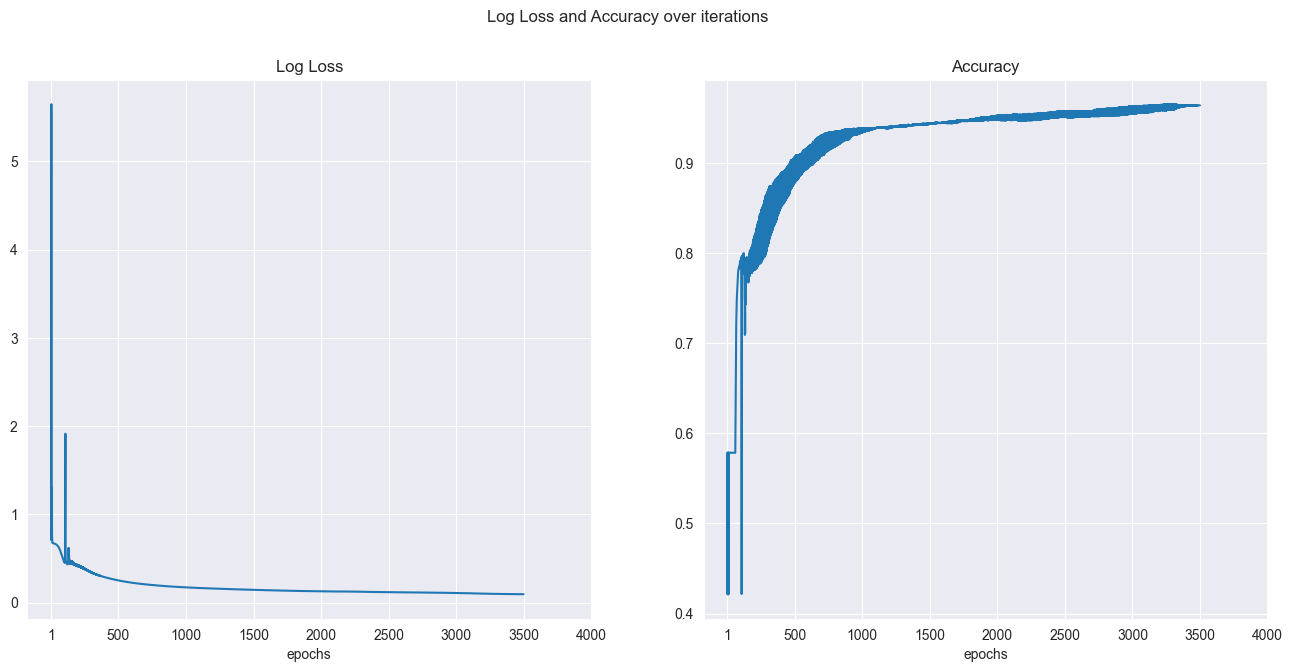

In [7]:
hidden_layer = 20
num_epochs = 3500
learning_rate = 0.0016
best_loss_vals, best_accuracies, tune_W_1, tune_W_2, last_y_pred, last_x_mat = train_model(hidden_layer, num_epochs, learning_rate)
plot_loss_accuracy(best_loss_vals, best_accuracies)

## <span style="color: yellow;">คำตอบ</span>
จากผลการทดสอบ พบว่าการจำเป็นต้องเปลี่ยนแปลงค่าดังต่อไปนี้ จึงสามารถที่จะทำให้ Accuracy สูงกว่า 95% ได้  
1. W_1_Output_Layer
2. num_epochs
3. learning_rate

โดยค่าที่สามารถทำให้ Accuracy สูงกว่า 95% คือ  
```python
hidden_layer = 20
num_epochs = 3500
learning_rate = 0.0016
```

จากผลลัพธ์ที่ได้ Accuracy ของ epoch รอบที่ 3500 มีค่าเท่ากับ **0.9640**
แต่ผลลัพธ์ในการ run แต่ละครั้งได้ค่า Accuracy จะเหวี่ยงไปมา ไม่เท่ากันในแต่ละรอบ แต่ยังมากกว่า 95% อยู่

**เหตุผล**
1. W_1_Output_Layer หรือ hidden_layer เป็นเหมือนกับจำนวน Neuron ที่จะทำให้ Model นั้นเรียนรู้ได้มากขึ้น แล้วการที่ Neuron มีจำนวนเยอะขึ้นก็จะส่งผลให้ความสามารถในการ Train ของ Model นั้นจะซับซ้อนขึ้นตาม ซึ่งเป็นเหมือนการทำให้ Model นั้นสามารถแยกแยะรูปแบบได้มากขึ้น
2. num_epochs ตามความเข้าใจคือจำนวนรอบที่ Model จะ Train ไปเรื่อยๆ จากการทดลองของข้อที่ 1 แม้จะให้ hidden_layer เพิ่มไปถึง 100 แต่ num_epochs ที่ 1000 ทำให้ได้ accuracy ไม่ถึง 95% แสดงว่ายิ่งจำนวน hidden_layer มีค่ามากขึ้นเหมือนกับการเพิ่มความซับซ้อน num_epochs จึงต้องเพิ่มตามเพื่อให้เวลาการ Train สมเหตุสมผล
3. learning_rate เข้าใจแค่ว่าแต่ละการ Train ของแต่ละ Data นั้นจะมี learning_rate ที่เหมาะสม ซึ่งในกรณีนี้คิดว่า learning_rate = 0.0016 นั้นเหมาะสมที่สุดสำหรับ Data ชุดนี้ 

## <span style="color: green;">3. ให้วาดกราฟของคลาส Positive และ Negative ที่ทำนายถูกและไม่ถูก และให้แสดง Confustion Matrix ดังตัวอย่างในรูป และให้เขียนอธิบายสิ่งที่สังเกตได้จากกราฟทั้งสอง</span>
![](https://drive.google.com/thumbnail?id=156xTSDBMlhHJBlVnBG2KvOeUt-reneE0&sz=w642)
![](https://drive.google.com/thumbnail?id=16lVXq3JWbGlw_QRx1_YWBQvMXL0DdsjH&sz=w482)

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Classes
def plot_classes(y_pred, y, x_mat):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(x_mat[(y_pred > 0.5) & (y == 1), 0], x_mat[(y_pred > 0.5) & (y == 1), 1], 'x', label='True Positive', color='blue')
    ax.plot(x_mat[(y_pred < 0.5) & (y == 0), 0], x_mat[(y_pred < 0.5) & (y == 0), 1], 'o', label='True Negative', color='orange')
    ax.plot(x_mat[(y_pred > 0.5) & (y == 0), 0], x_mat[(y_pred > 0.5) & (y == 0), 1], 'x', label='False Positive', color='purple')
    ax.plot(x_mat[(y_pred < 0.5) & (y == 1), 0], x_mat[(y_pred < 0.5) & (y == 1), 1], 'o', label='False Negative', color='red')
    ax.grid(True)
    ax.legend(loc='best', bbox_to_anchor=(1, 1))
    plt.title('Truth vs Prediction')
    plt.show()

# Confusion Matrix
def plot_confusion_matrix(y_pred, y):
    cm = confusion_matrix(y, (y_pred > 0.5).astype(int))
    fig, ax = plt.subplots(figsize=(6, 6))
    labels = ['Negative', 'Positive']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, xticklabels=labels, yticklabels=labels)
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Actuals')
    plt.show()

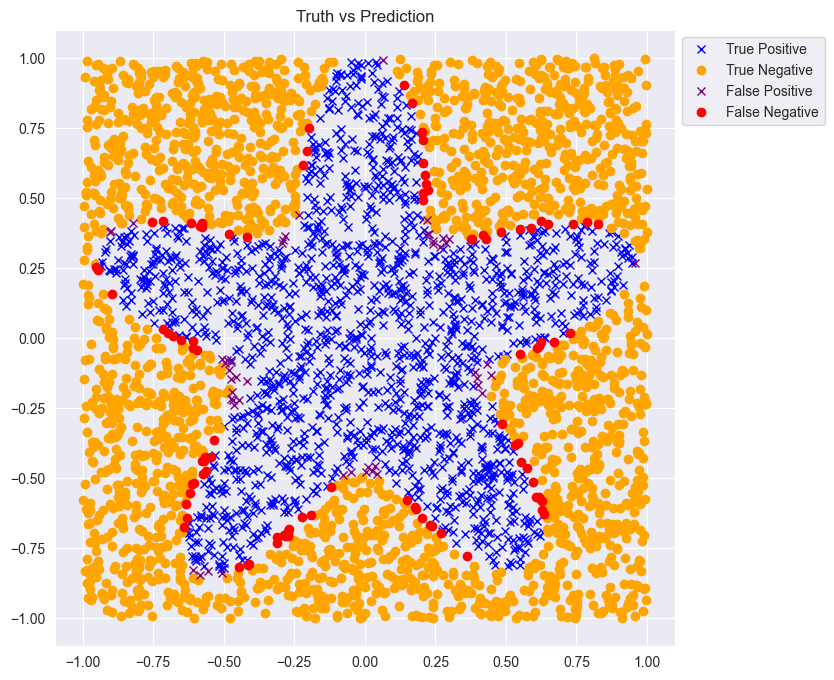

In [14]:
plot_classes(last_y_pred, y, x_mat_full)

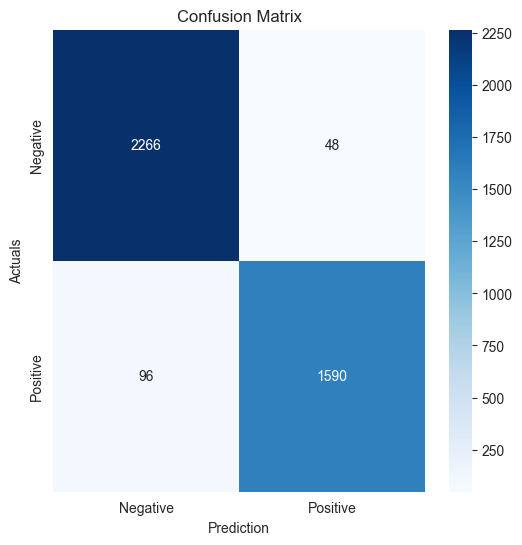

In [10]:
plot_confusion_matrix(last_y_pred, y)

## <span style="color: yellow;">คำตอบ</span>
จากการวาดกราฟของ Class Positive และ Negative ที่ทำนายถูกและไม่ถูก พบว่ามีการทำนายที่ถูกต้องมากกว่าที่ทำนายผิดอย่างเห็นได้ชัด
และจากภาพที่แสดงนั้นจะเห็นว่าบริเวณที่ทำนายผิดนั้นจะอยู่ที่ขอบของรูปดาวเป็นหลัก แสดงให้เห็นว่า Model ยังไม่สามารถแยกแยะรูปแบบได้ในบรีเวณที่ข้อมูลคาบเกี่ยวกับ จึงทำให้เกิดการผิดพลาดบริเวณขอบ

จากการวาดกราฟของ Confusion Matrix พบว่ามีการทำนายที่ถูกต้องมากกว่าที่ทำนายผิดอย่างเห็นได้ชัดเช่นกัน
| จำนวนครั้งที่ทาย Positive ถูกต้อง | จำนวนครั้งที่ทาย Negative ถูกต้อง | จำนวนครั้งที่ทาย Positive ผิด | จำนวนครั้งที่ทาย Negative ผิด  |
|:----------------------------|:----------------------------|:--------------------------|:--------------------------|
| 1590                        | 2266                        | 48                        | 96                        |



## <span style="color: green;">4. ใช้โมเดลที่เทรนได้ค่า accuracy ตามที่โจทย์กำหนด ให้แสดงรายการข้อมูลที่โมเดลทำนายผิดของแต่ละคลาสมาอย่างละ 3 รายการ หรือหากมีจำนวนน้อยกว่า ให้แสดงเท่าที่มี</span>

In [24]:
def get_incorrect_class(y_pred, y, x_mat):
    incorrect_positive = x_mat[(y_pred > 0.5) & (y == 0)]
    incorrect_negative = x_mat[(y_pred < 0.5) & (y == 1)]

    return incorrect_positive, incorrect_negative

def show_incorrect_class(title, incorrect_positive):
    print(f"\n{title}:")
    for i in range(min(3, len(incorrect_positive))):
        print(f"Sample {i+1}: {incorrect_positive[i]}")

incorrect_positive, incorrect_negative = get_incorrect_class(last_y_pred, y, x_mat_full)
show_incorrect_class("Incorrect Positive Samples", incorrect_positive)
show_incorrect_class("Incorrect Negative Samples", incorrect_negative)


Incorrect Positive Samples:
Sample 1: [-0.4756512  -0.08626099  1.        ]
Sample 2: [-0.28141719  0.36435461  1.        ]
Sample 3: [ 0.04244094 -0.48546178  1.        ]

Incorrect Negative Samples:
Sample 1: [-0.63216238 -0.59087944  1.        ]
Sample 2: [-0.71410996  0.03165304  1.        ]
Sample 3: [-0.27101943 -0.68792282  1.        ]


## <span style="color: yellow;">คำตอบ</span>
ตัวอย่างการทำนาย Positive ผิด 3 รายการ
```txt
Sample 1: [-0.4756512  -0.08626099  1.        ]
Sample 2: [-0.28141719  0.36435461  1.        ]
Sample 3: [ 0.04244094 -0.48546178  1.        ]
```

ตัวอย่างการทำนาย Negative ผิด 3 รายการ
```txt
Sample 1: [-0.63216238 -0.59087944  1.        ]
Sample 2: [-0.71410996  0.03165304  1.        ]
Sample 3: [-0.27101943 -0.68792282  1.        ]
```